<h2 align="center"><b>Кмоп'ютерний практикум №8</b></h2>
<h3 align="center">Дослідження особливостей алгоритму пірамідального сортування</h3>
<h5 align="right">Роботу виконав студент групи ФІ-21, Беркута Володимир</h5>

### **Мета роботи**

Реалiзацiя алгоритму пiрамiдального сортування.

### **Завдання на комп'ютерний практикум**

1) Дослідити особливості реалізації черги з пріоритетами стндартної бібліотеки обраної мови програмування або однієї з додаткових бібіліотек.

2) Реалізувати алгоритм пірамідального сортування та продемонструвати його роботу з даними різного розміру.

In [14]:
import matplotlib.pyplot as plt
import random
import time
import copy

print("Import complete")

Import complete


### Черга з пріоритетами

Один із способів реалізації черги з пріоритетом в мові програмування Python є за допомогою структури ``list``:

In [15]:
customers = []
customers.append((2, "Harry"))
customers.append((3, "Charles"))
customers.sort() 
#Need to sort to maintain order
customers.append((1, "Riya"))
customers.sort() 
#Need to sort to maintain order
customers.append((4, "Stacy"))
customers.sort()
while customers:
     print(customers.pop(0))

(1, 'Riya')
(2, 'Harry')
(3, 'Charles')
(4, 'Stacy')


Отже, головна ідея, це постійно сортувати список у відповідному порядку. Оскільки використовується QuickSort то складність сортування є $\theta(\log n)$. Всього записів $n$, тому загальна складність опреації ``Insert`` буде $\theta(n\cdot\log n)$. Операція ``Extract`` має складність $\theta(1)$. Отже таку реалізацію варту викоритсовувати, коли не потрібно багато використовувати операцію ``Insert``.

Розглянемо бібілотеку ``heapq``

In [16]:
import heapq
customers = []
heapq.heappush(customers, (2, "Harry"))
heapq.heappush(customers, (3, "Charles"))
heapq.heappush(customers, (1, "Riya"))
heapq.heappush(customers, (4, "Stacy"))
while customers:
     print(heapq.heappop(customers))

(1, 'Riya')
(2, 'Harry')
(3, 'Charles')
(4, 'Stacy')


Бібліотека ``heapq`` у імплементації черги з пріоритетами бібіліотека використовує структуру даних піраміда. Тому складність операцій ``Insert`` та ``Extract`` є $\theta(\log n)$

### Пірамідальне сортування

In [17]:
def Parent(x):
    return (x - 1)>>1

def Left(x):
    return ((x + 1)<<1) - 1

def Right(x):
    return (x + 1)<<1


def MinHeapify(A: list, x):
    l = Left(x)
    r = Right(x)
    if l < len(A) and A[l] < A[x]:
        smallest = l
    else:
        smallest = x
    if r < len(A) and A[r] < A[smallest]:
        smallest = r
    if smallest != x:
        A[x], A[smallest] = A[smallest], A[x]
        A = MinHeapify(A, smallest)
    return A


def BuildMinHeap(A: list):
    for i in range(len(A) // 2, -1, -1):
        A = MinHeapify(A, i)
    return A

In [18]:
def HeapSort(A):
    A = BuildMinHeap(A)
    for i in range(len(A)-1, 0, -1):
        A[0], A[i] = A[i], A[0]
        A[:i] = MinHeapify(A[:i], 0)
    return A

In [57]:
test = [random.randint(0, 100) for _ in range(10)]

print(f"test_data: {test}\n\nsorted: {HeapSort(test)}")

test_data: [54, 24, 32, 28, 33, 30, 48, 97, 75, 87]

sorted: [97, 87, 75, 54, 48, 33, 32, 30, 28, 24]


### Генерація набору даних

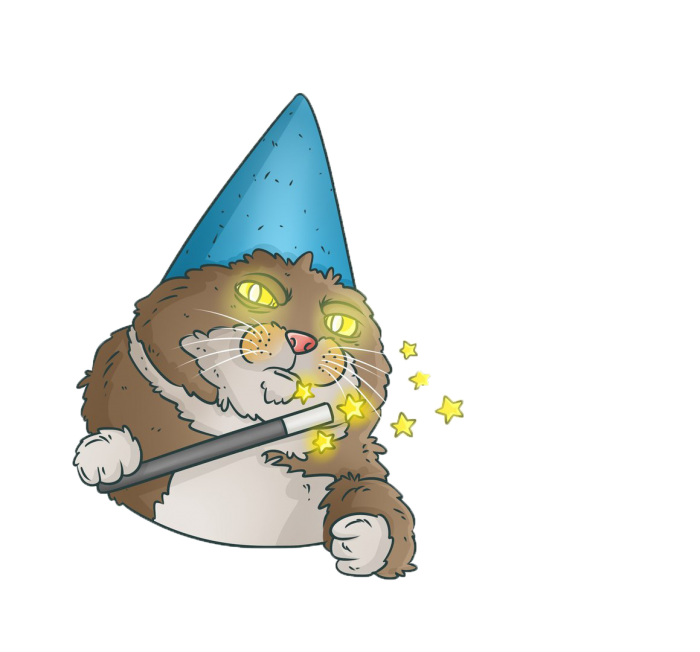

Однакові

In [19]:
def get_identical_elements(size: int, amount: int):
    res = []
    for _ in range(amount):
        res.append([0x5f3759df]*size)   # :)
    return res

get_identical_elements(5, 2) 

[[1597463007, 1597463007, 1597463007, 1597463007, 1597463007],
 [1597463007, 1597463007, 1597463007, 1597463007, 1597463007]]

Відсортовані

In [20]:
def get_sorted_elements(size: int, amount: int):
    res = []
    for _ in range(amount):
        res.append(list(range(size)))
    return res

get_sorted_elements(5, 2)

[[0, 1, 2, 3, 4], [0, 1, 2, 3, 4]]

Відсортовані у зворотньому порядку

In [21]:
def get_reverse_sorted_elements(size: int, amount: int):
    res = []
    for _ in range(amount):
        res.append(list(range(size - 1, -1, -1)))
    return res

get_reverse_sorted_elements(5, 2)

[[4, 3, 2, 1, 0], [4, 3, 2, 1, 0]]

Випадкові

In [22]:
def get_random_elements(size: int, amount: int):
    res = []
    for _ in range(amount):
        res.append([random.randint(0, size + 1) for _ in range(size)])
    return res

get_random_elements(5, 2)

[[3, 0, 1, 1, 1], [3, 1, 4, 2, 6]]

Майже відсортовані

In [23]:
def get_almost_sorted_elements(size: int, amount: int):
    res = []
    for _ in range(amount):
        tmp = list(range(size))
        for i in range(1, size):
            if random.random() >= 0.8:
                tmp[i], tmp[i - 1] = tmp[i - 1], tmp[i]
        res.append(tmp)
    return res

get_almost_sorted_elements(5, 2)

[[0, 1, 3, 2, 4], [0, 1, 2, 4, 3]]

### Графіки

In [45]:
X = list(range(1000, 21_001, 5000))
amount = 10

In [46]:
title = ["Однакові", "Відсортовані", "Відсортовані у зворотньому порядку", "Випадкові", "Майже відсортовані"]
func_gen = [get_identical_elements, get_sorted_elements, get_reverse_sorted_elements, get_random_elements, get_almost_sorted_elements]

Y = dict()

for i in range(len(title)):
    Y[title[i]] = []
    for x in X:
        A = func_gen[i](x, amount)
    
        start_time = time.time()    
        for a in A:
            HeapSort(a)
    
        Y[title[i]].append((time.time() - start_time)/amount)

Text(0.5, 0, 'Розмір масиву')

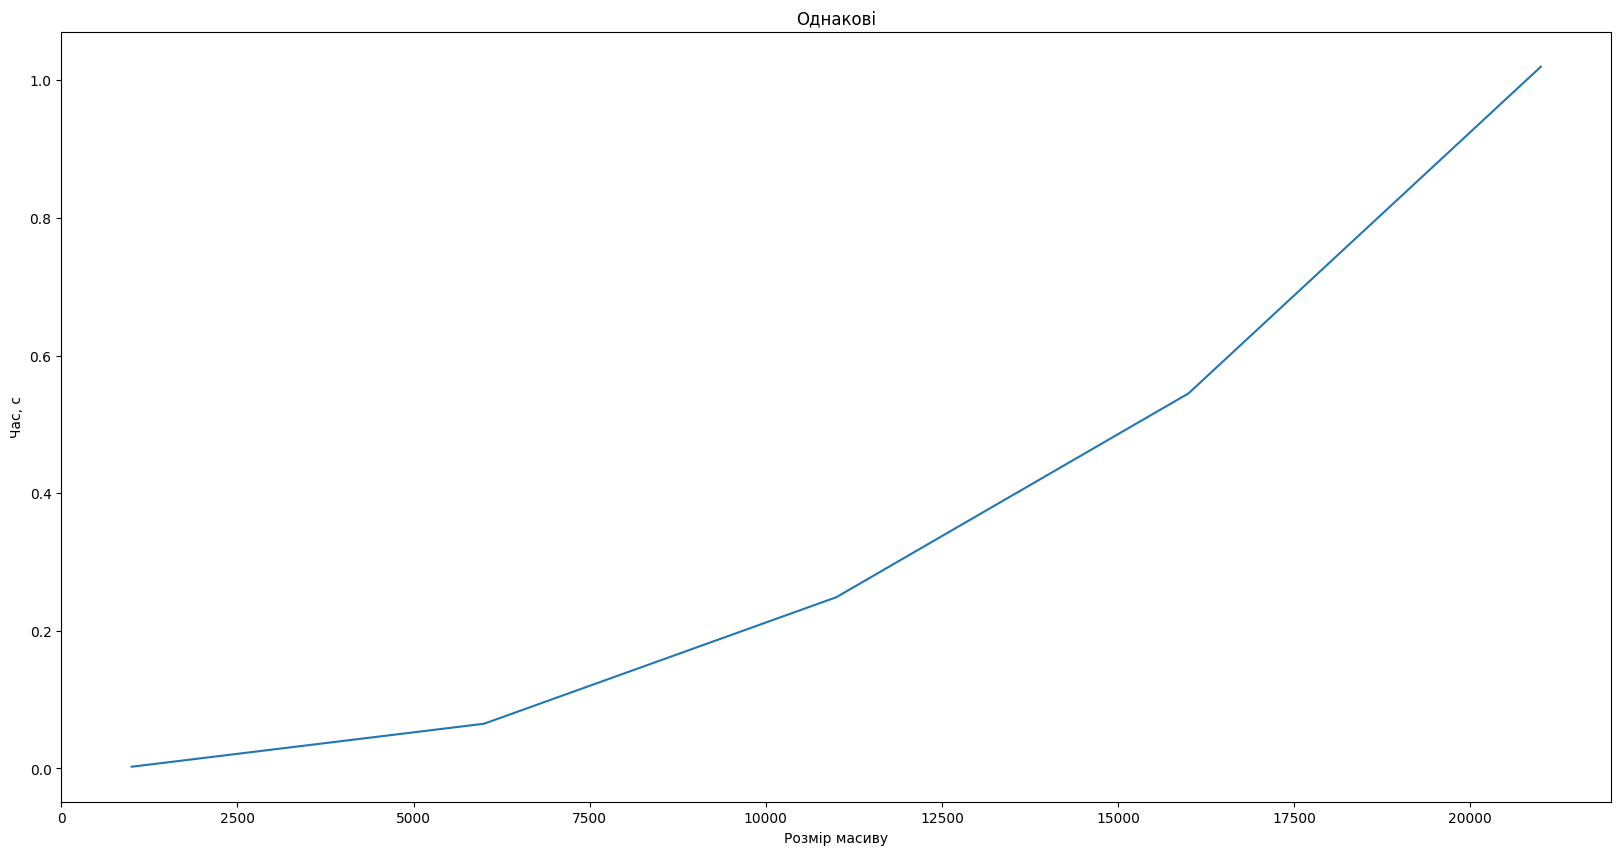

In [64]:
i = 0
plt.figure(figsize=(20, 10))
plt.plot(X, Y[title[i]], label=title[i])
plt.title(title[i])
plt.ylabel("Час, с")
plt.xlabel("Розмір масиву")

Text(0.5, 0, 'Розмір масиву')

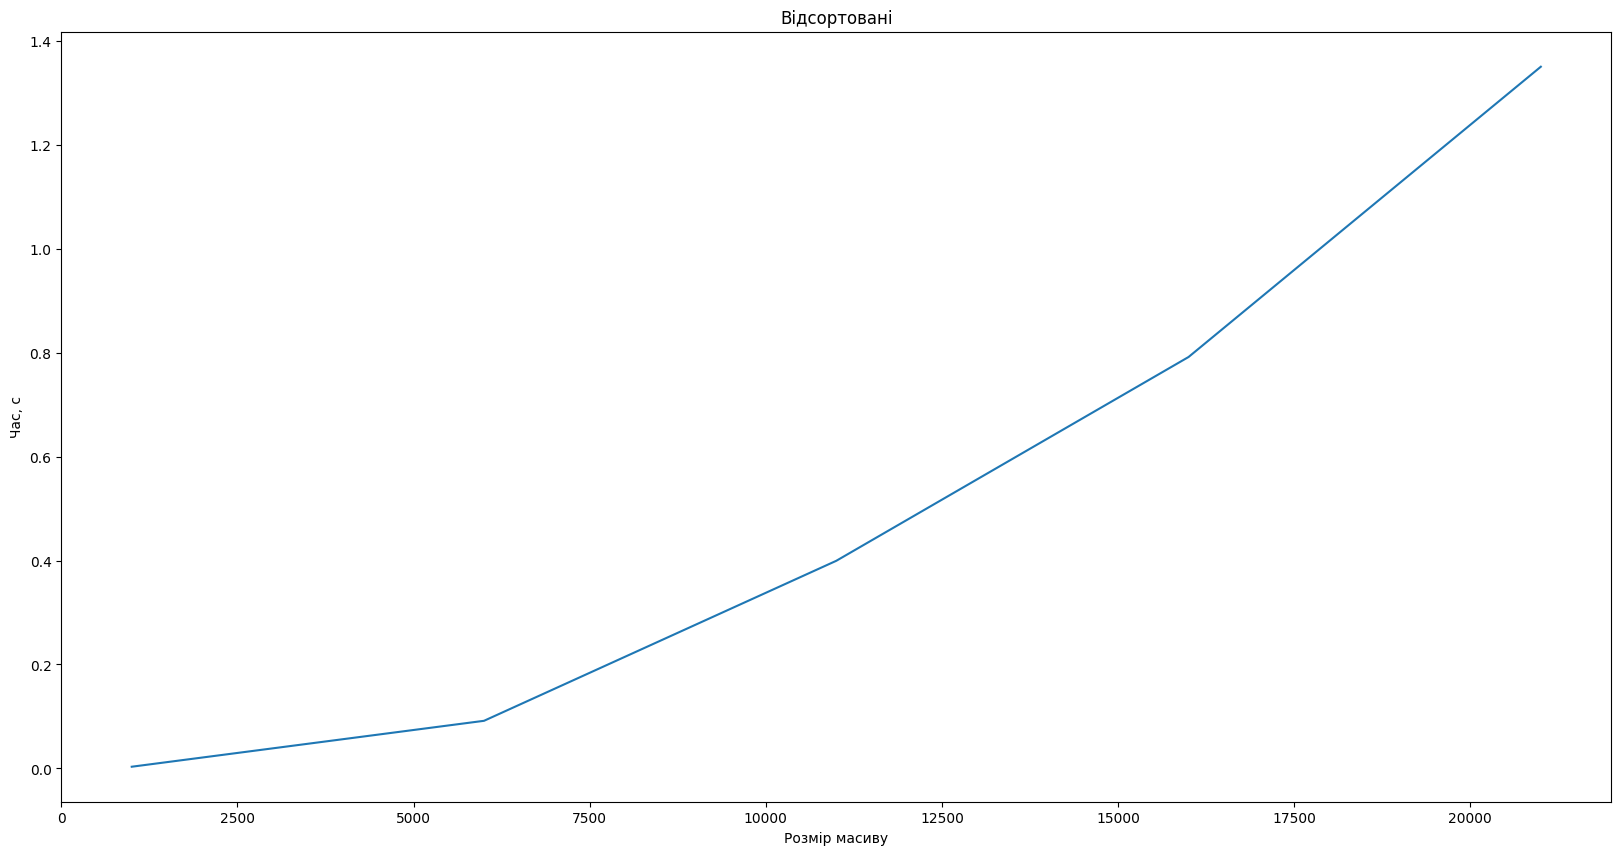

In [65]:
i = 1
plt.figure(figsize=(20, 10))
plt.plot(X, Y[title[i]], label=title[i])
plt.title(title[i])
plt.ylabel("Час, с")
plt.xlabel("Розмір масиву")

Text(0.5, 0, 'Розмір масиву')

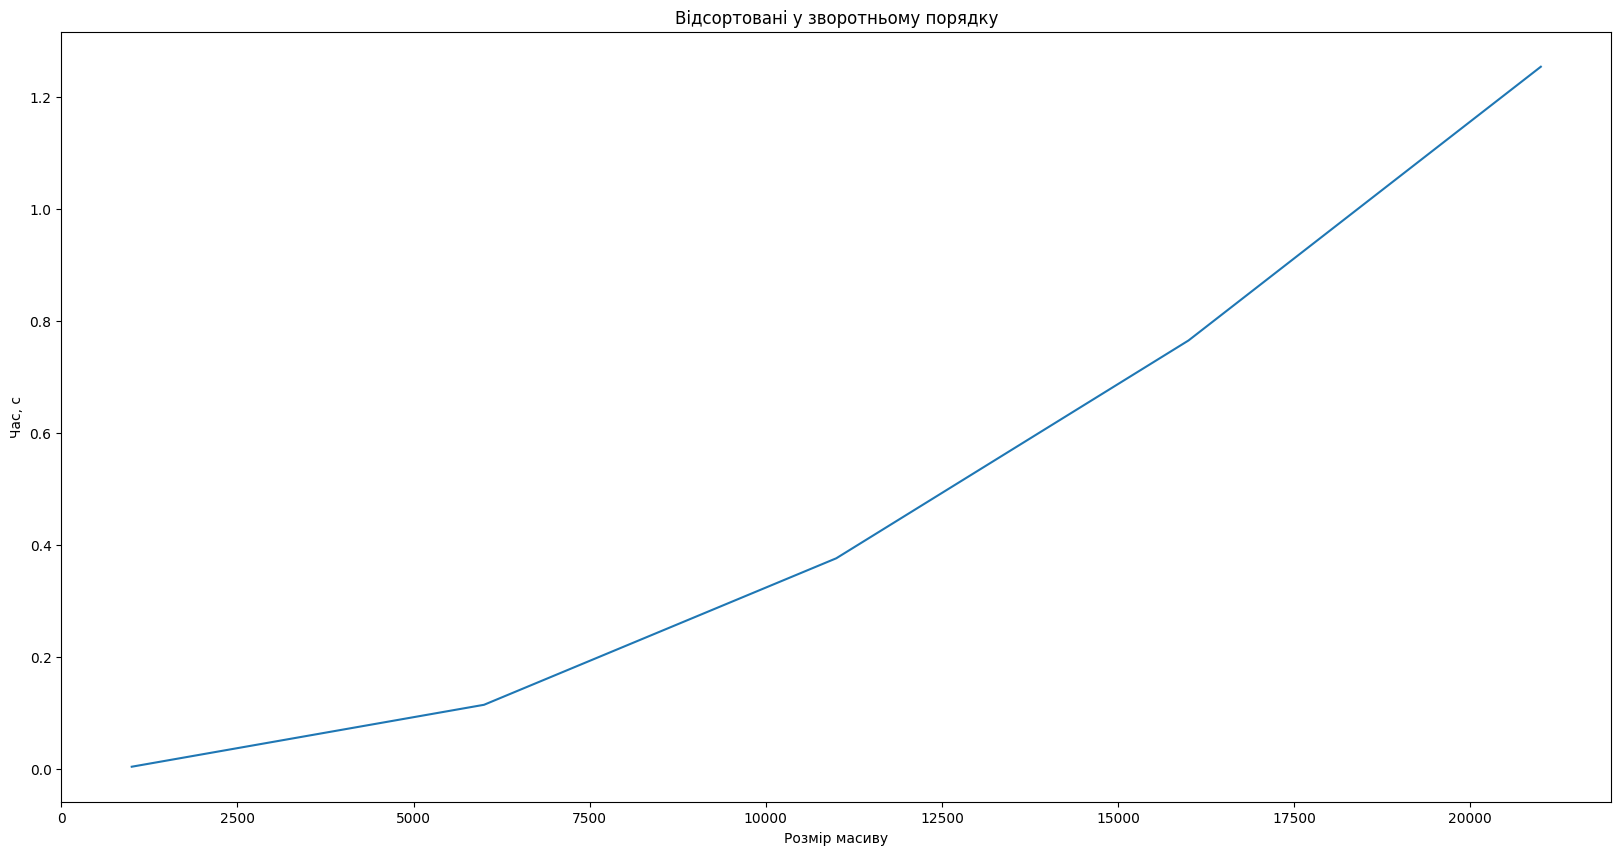

In [66]:
i = 2
plt.figure(figsize=(20, 10))
plt.plot(X, Y[title[i]], label=title[i])
plt.title(title[i])
plt.ylabel("Час, с")
plt.xlabel("Розмір масиву")

Text(0.5, 0, 'Розмір масиву')

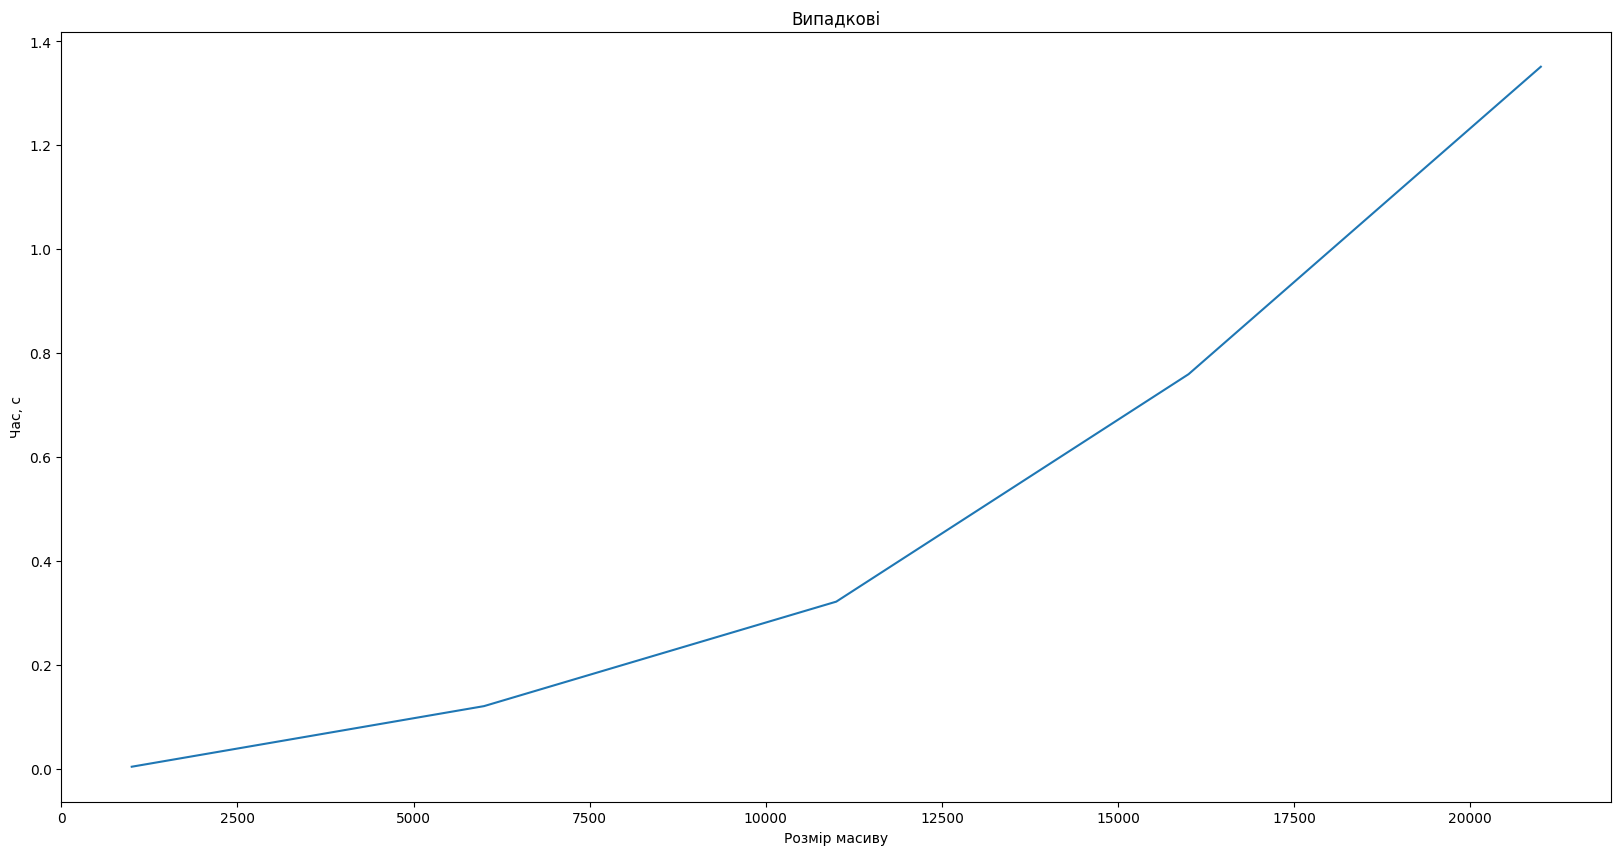

In [67]:
i = 3
plt.figure(figsize=(20, 10))
plt.plot(X, Y[title[i]], label=title[i])
plt.title(title[i])
plt.ylabel("Час, с")
plt.xlabel("Розмір масиву")

Text(0.5, 0, 'Розмір масиву')

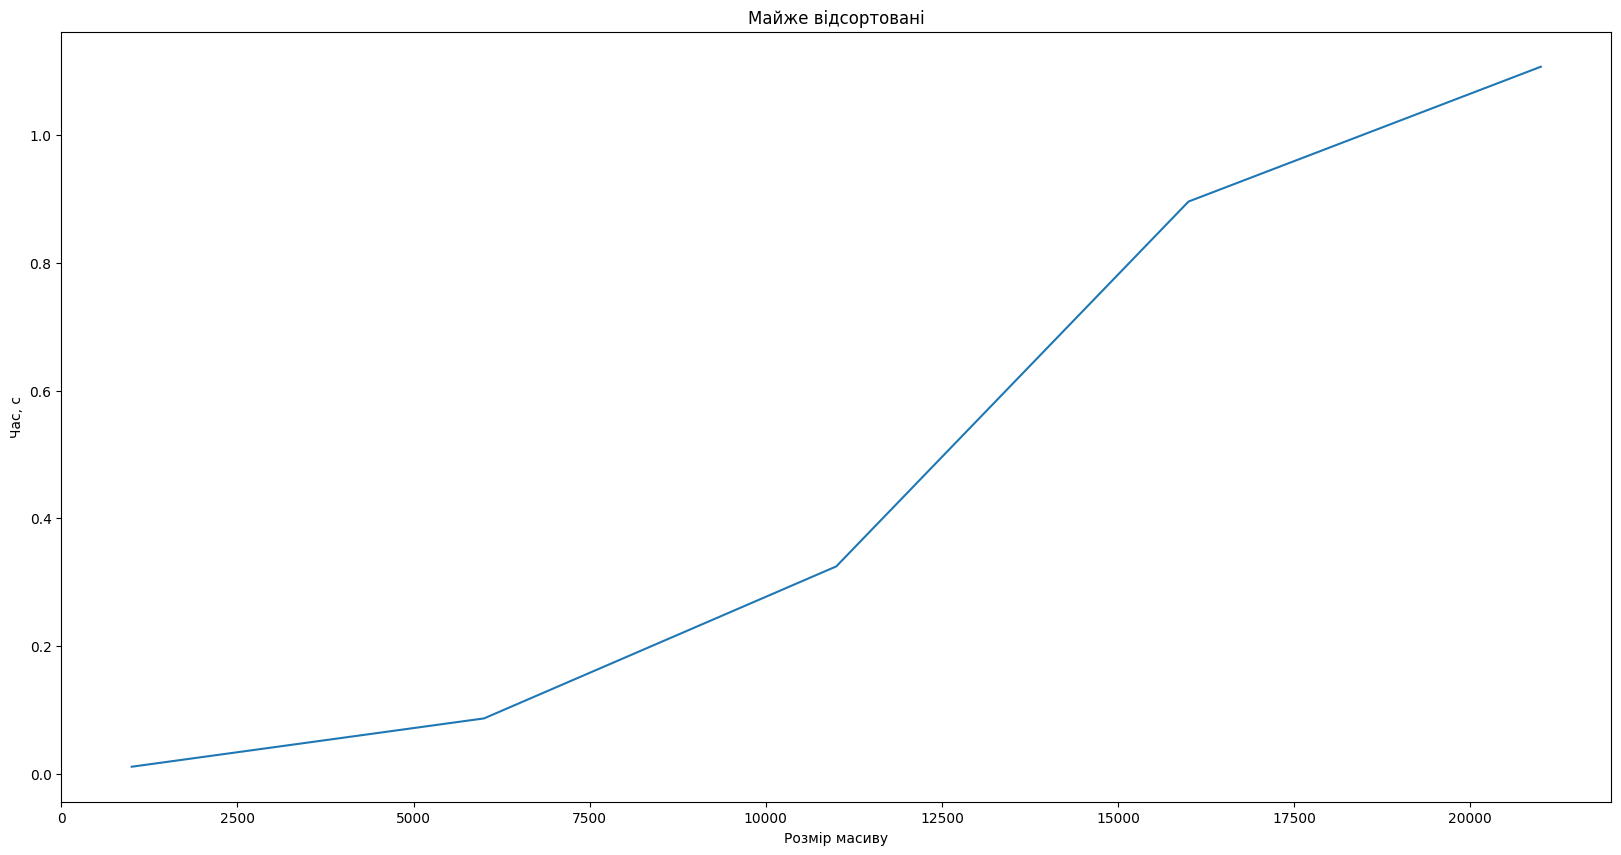

In [68]:
i = 4
plt.figure(figsize=(20, 10))
plt.plot(X, Y[title[i]], label=title[i])
plt.title(title[i])
plt.ylabel("Час, с")
plt.xlabel("Розмір масиву")